<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* GridSerchCV
* Customer Analysis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [2]:
raw = skd.fetch_california_housing()
X = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X.columns = [a.lower() for a in X.columns]
X.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df = pd.DataFrame(np.c_[raw['data'], raw['target']], columns = raw['feature_names'] + ['price'])
df.columns = [a.lower() for a in df.columns]
df.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


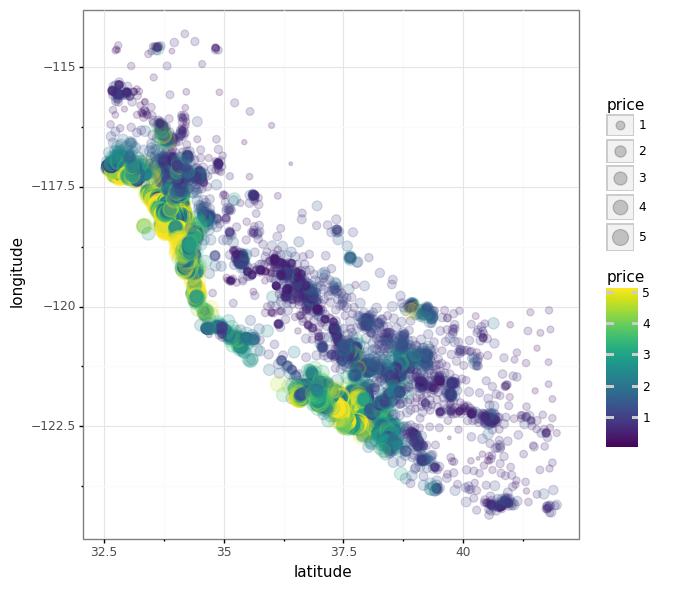

<ggplot: (8757005457133)>

In [12]:
(
    ggplot(df, aes('latitude', 'longitude', color = 'price')) +
    gg.geom_point(aes(size = 'price'), alpha = .2) +
    gg.theme_bw() +
    gg.coord_fixed()
)

In [13]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size = .7)

In [15]:
scaler = RobustScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [16]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
fit_rf_std = RandomForestRegressor().fit(x_tr_std, y_tr)

In [18]:
pred_rf = fit_rf.predict(x_te)
pred_rf_std = fit_rf.predict(x_te_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


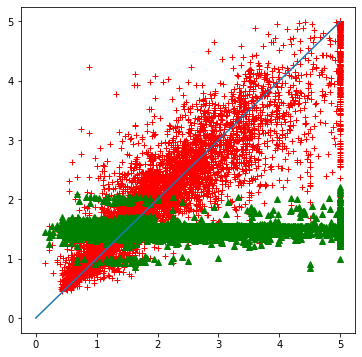

In [27]:
plt.figure(figsize = [6,6])
plt.plot(y_te, pred_rf, '+', color = 'red')
plt.plot(y_te, pred_rf_std, '^', color = 'green')
plt.plot([0,5], [0,5])

In [28]:
mean_squared_error(y_te, pred_rf), mean_squared_error(y_te, pred_rf_std)

(0.2680618150700339, 1.662194275300416)

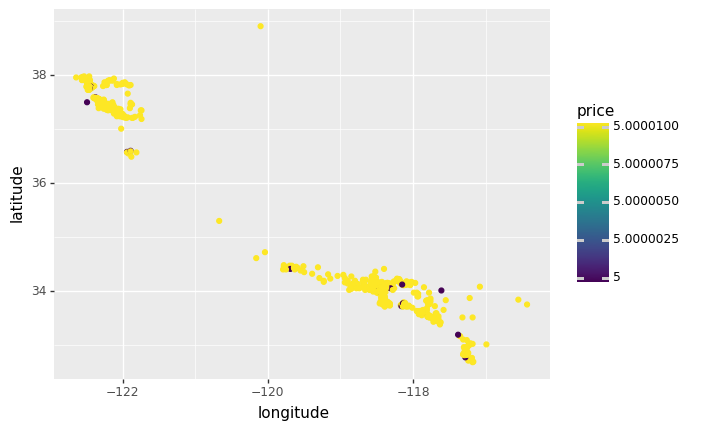

<ggplot: (8757004637181)>

In [31]:
(
    ggplot(df[df['price'] >= 5], aes('longitude', 'latitude', color = 'price')) +
    gg.geom_point()
)

In [34]:
list_strange = df[df['price'] >= 5].index
list_strange

Int64Index([   89,   459,   493,   494,   509,   510,   511,   512,   514,
              517,
            ...
            20326, 20335, 20367, 20380, 20389, 20422, 20426, 20427, 20436,
            20443],
           dtype='int64', length=992)

In [43]:
df = df.assign(flag = lambda x : np.where(x.price >= 5, 'o', 'x'))
df.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price,flag
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,x
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,x
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,x
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,x
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,x


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: invalid value encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: invalid value encountered in multiply
  w = 1. / (h * n) * np.sum(self((xs-x)/h)

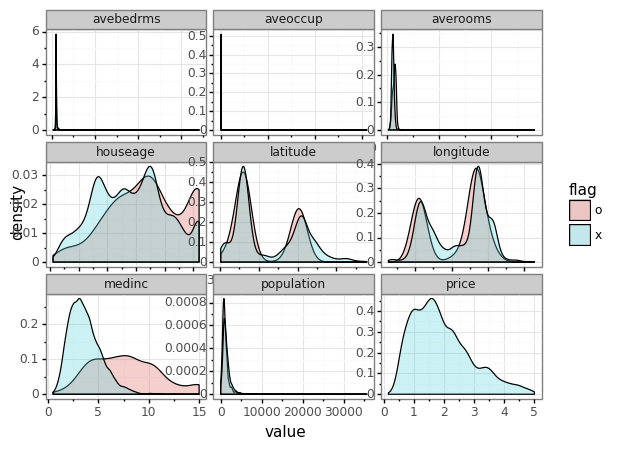

<ggplot: (8757004650937)>

In [46]:
(
    ggplot(pd.melt(df, id_vars = 'flag'), aes('value', fill = 'flag')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~variable', scales = 'free') +
    gg.theme_bw()
)

# Customer Analysis

In [47]:
os.listdir()

['.config',
 'rfm_test.csv',
 'retail_data_transactions.csv',
 'dh_store_lookup.csv',
 'dh_causal_lookup.csv',
 'dh_transactions.csv',
 'dh_product_lookup.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'retail_data_response.csv',
 'sample_data']

In [51]:
df_product = pd.read_csv('dh_product_lookup.csv')
df_trans = pd.read_csv('dh_transactions.csv')
df_product.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [52]:
df_trans.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [53]:
df_product.head()

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


In [55]:
df_product.shape, df_trans.shape

((927, 5), (5197681, 11))

In [57]:
df_product = df_product[['upc', 'brand', 'commodity']]

In [59]:
df = pd.merge(df_trans, df_product, 'left', 'upc')
df.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,brand,commodity
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,Barilla,pasta
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,Bertolli,pasta sauce
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,Hungry Jack,pancake mixes
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,Private Label,pasta
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,Private Label Premium,pasta


In [63]:
df['date'] = datetime.strptime('2021-01-01', '%Y-%m-%d') + df.day.astype('timedelta64[D]')
df.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,brand,commodity,date
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,Barilla,pasta,2021-01-02
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,Bertolli,pasta sauce,2021-01-02
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,Hungry Jack,pancake mixes,2021-01-02
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,Private Label,pasta,2021-01-02
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,Private Label Premium,pasta,2021-01-02


In [78]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')

In [94]:
cnt = df.groupby(['month', 'brand']).agg({'dollar_sales' : 'sum', 'units' : 'sum', 'brand' : 'size'})
cnt.columns = ['sales', 'units', 'count']

In [96]:
cnt = cnt.reset_index()
cnt.head()

,month,brand,sales,units,count
0,2021-01-01,Al Dente,217.54,56,53
1,2021-01-01,Alaga,364.79,131,123
2,2021-01-01,Alessi,94.88,32,28
3,2021-01-01,Annie Chns,2.89,1,1
4,2021-01-01,Arlow,2.49,1,1


In [98]:
cnt = cnt.assign(ratio = cnt.groupby(['month'])['sales'].apply(lambda x : x/x.sum()))

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


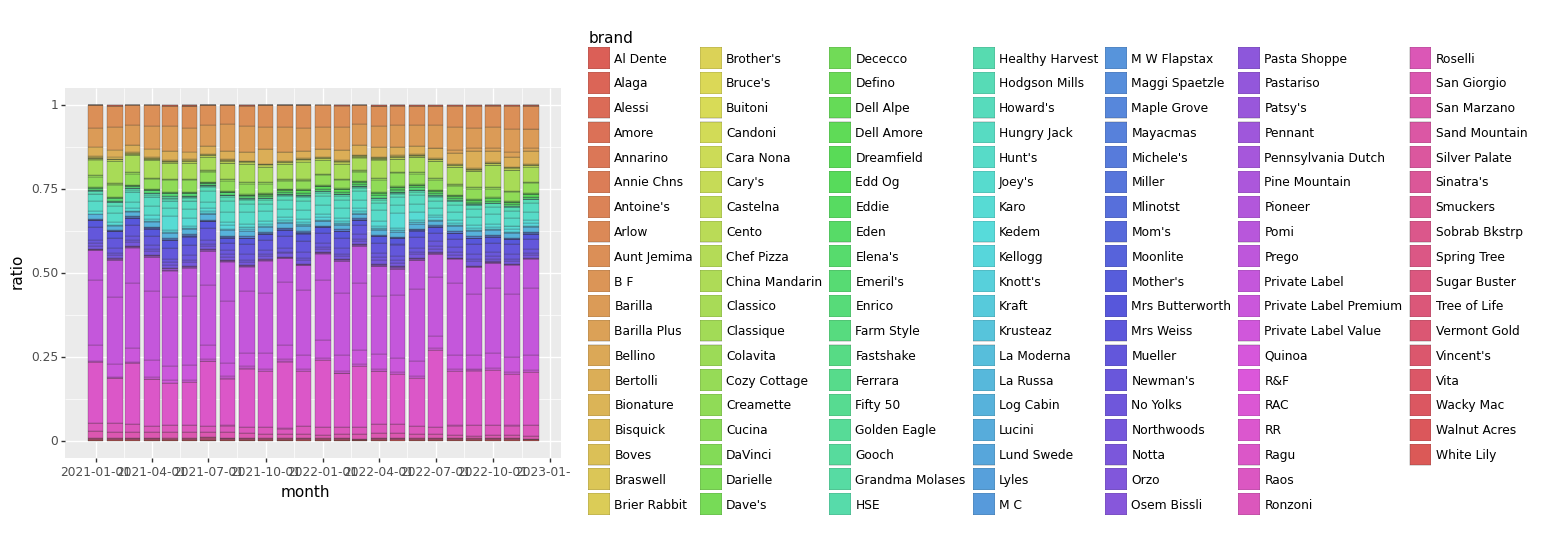

<ggplot: (8757001526821)>

In [101]:
(
    ggplot(cnt, aes('month', 'ratio', fill = 'brand')) + 
    gg.geom_col(color = '#333333', size = 0.1)
)

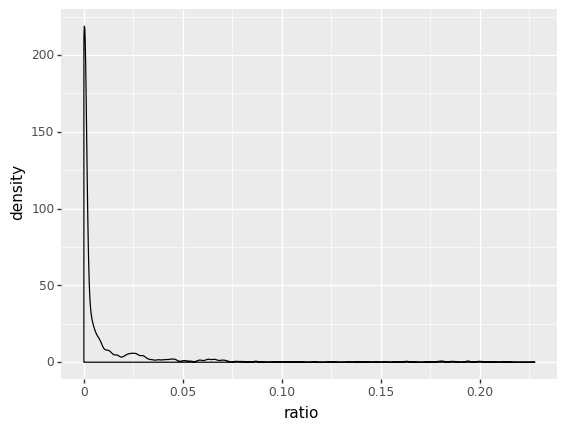

<ggplot: (8757004639881)>

In [102]:
(
    ggplot(cnt, aes('ratio')) +
    gg.geom_density()
)

In [115]:
cnt = cnt.assign(brand2 = lambda x : np.where(x['ratio'] < 0.05, 'etc', x['brand']))
cnt2 = cnt.groupby(['month','brand2'])['sales'].sum().reset_index()
cnt2 = cnt2.assign(ratio = cnt2.groupby(['month'])['sales'].apply(lambda x : x/x.sum()))
cnt2.head()

,month,brand2,sales,ratio
0,2021-01-01,Aunt Jemima,25558.43,0.066480
1,2021-01-01,Barilla,22396.44,0.058256
2,2021-01-01,Prego,34684.52,0.090218
3,2021-01-01,Private Label,74615.21,0.194082
4,2021-01-01,Ragu,69185.58,0.179959


In [118]:
cnt3 = pd.melt(cnt2, id_vars=['month', 'brand2'])
cnt3.head()

,month,brand2,variable,value
0,2021-01-01,Aunt Jemima,sales,25558.43
1,2021-01-01,Barilla,sales,22396.44
2,2021-01-01,Prego,sales,34684.52
3,2021-01-01,Private Label,sales,74615.21
4,2021-01-01,Ragu,sales,69185.58


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


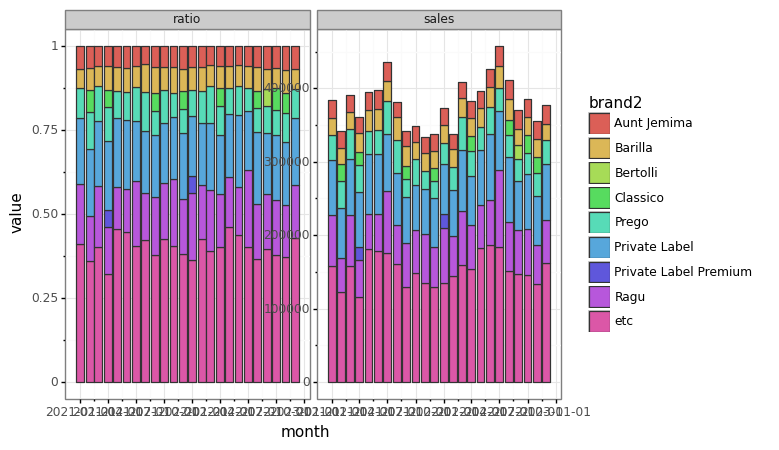

<ggplot: (8757001176945)>

In [120]:
(
    ggplot(cnt3, aes('month', 'value', fill = 'brand2')) +
    gg.geom_col(color = '#333333') +
    gg.facet_wrap('~variable', scales = 'free') +
    gg.theme_bw() 
)